# Introduction
#Getting a loan approved can feel like a mysterious process - you submit your application and wait, never really knowing what factors the bank is considering. I wanted to understand this better, so I analyzed loan application data to see if we can predict whether someone will get approved for a loan or not. This project helps demystify the loan approval process by looking at real financial factors that banks actually care about.

# Problem Statement
#Banks receive thousands of loan applications every day, and manually reviewing each one takes time and can be inconsistent. Some worthy applicants might get rejected while risky ones might get approved. There had to be a better way! I wanted to create a system that could quickly and accurately predict loan approvals based on key financial indicators like income, credit score, and assets. The challenge was to build a model that could learn from past decisions and make fair predictions for new applications.

# Import all Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv("C:\\UMAR DATA\\Data Sciences\\machine learning\\Projects\\kaggle dataset\\loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Data Understanding

In [3]:
df=df.drop(['loan_id'],axis='columns')
print(f'Shape of the Dataset:{df.shape}\n')
print(f'Null Values in Dataset:\n{df.isnull().sum()}\n')
print(f'Duplicated Values in Dataset:{df.duplicated().sum()}\n')
print(f'Drop Duplicated Values:{df.drop_duplicates(inplace=True)}\n')
print(f'Basic Information about Dataset:{df.info()}')

Shape of the Dataset:(4269, 12)

Null Values in Dataset:
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Duplicated Values in Dataset:0

Drop Duplicated Values:None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term 

In [4]:
df_cate=df.select_dtypes(include='object')
df_category=df_cate.columns
print(f'Total Numbers of Categorical variable is {len(df_category)}')
df_num=df.select_dtypes(include='number')
df_number=df_num.columns
print(f'Total Number of Numerical data is {len(df_number)}')

Total Numbers of Categorical variable is 3
Total Number of Numerical data is 9


In [5]:
print(f'Basic Summary of Numerical Features:\n{df.describe()}')

Basic Summary of Numerical Features:
       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.5126

In [6]:
print(f"Basic Summary of Categorical Features:\n{df.describe(include='object')}")

Basic Summary of Categorical Features:
        education self_employed loan_status
count        4269          4269        4269
unique          2             2           2
top      Graduate           Yes    Approved
freq         2144          2150        2656


# Feature Engineering

In [7]:
df.columns = df.columns.str.replace(' ','')
df['income_per_month']=df['income_annum']/12
df['income_per_month(lac)']=df['income_per_month']/100000
df['loan_amount(lac)']=df['loan_amount']/100000
df['commercial_assets_value(lac)']=df['commercial_assets_value']/100000
df['luxury_assets_value']=df['luxury_assets_value']/100000
df['residential_assets_value(lac)']=df['residential_assets_value']/100000
df['bank_asset_value']=df['bank_asset_value']/100000
df=df.drop(['loan_amount','commercial_assets_value','luxury_assets_value','bank_asset_value','income_per_month','residential_assets_value'],axis='columns')
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,loan_status,income_per_month(lac),loan_amount(lac),commercial_assets_value(lac),residential_assets_value(lac)
0,2,Graduate,No,9600000,12,778,Approved,8.000000,299.0,176.0,24.0
1,0,Not Graduate,Yes,4100000,8,417,Rejected,3.416667,122.0,22.0,27.0
2,3,Graduate,No,9100000,20,506,Rejected,7.583333,297.0,45.0,71.0
3,3,Graduate,No,8200000,8,467,Rejected,6.833333,307.0,33.0,182.0
4,5,Not Graduate,Yes,9800000,20,382,Rejected,8.166667,242.0,82.0,124.0


# Exploratory Data Analysis

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_1404\1104580535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='loan_status',palette='Set2')


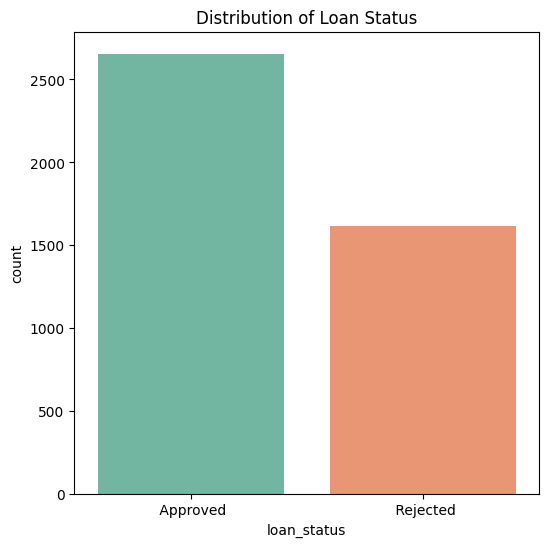

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='loan_status',palette='Set2')
plt.title("Distribution of Loan Status")

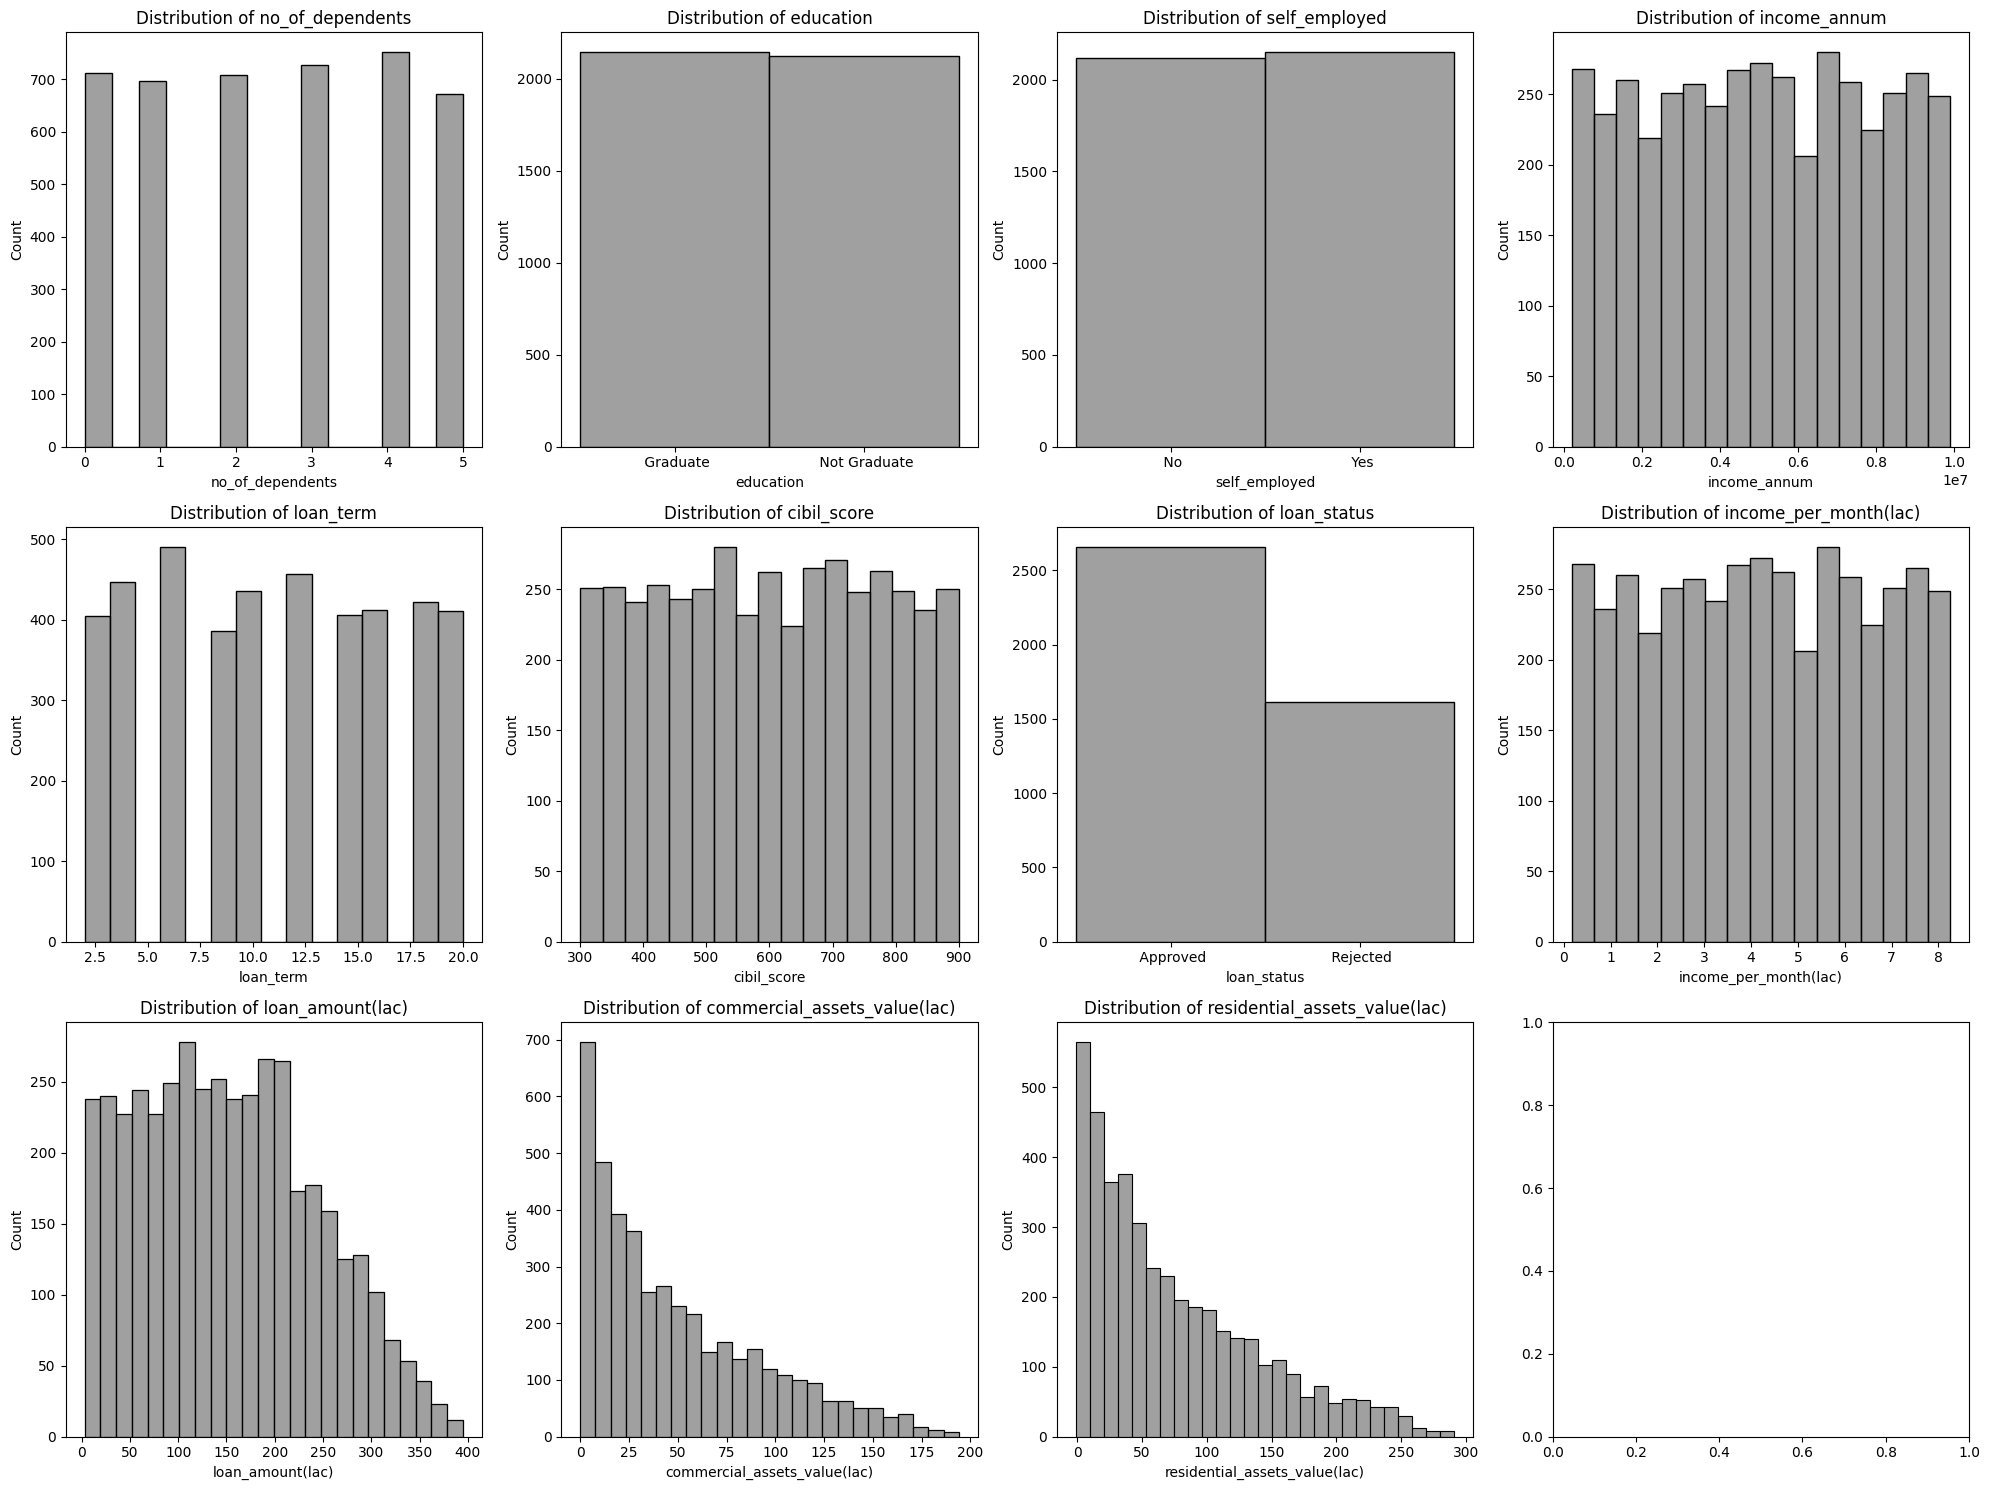

In [9]:
fig,axis=plt.subplots(3,4,figsize=(20,15))
axis=axis.flatten()
for i ,col in enumerate(df):
    ax=axis[i] 
    sns.histplot(data=df,x=col,color='grey',ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_1404\13195494.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('C:\\UMAR DATA\\Data Sciences\\Intership\\Developer Hub\\task1\\relationship of all.png', dpi=300, bbox_inches='tight', transparent=True)
C:\Users\Qadri Laptop\PycharmProjects\numpy\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


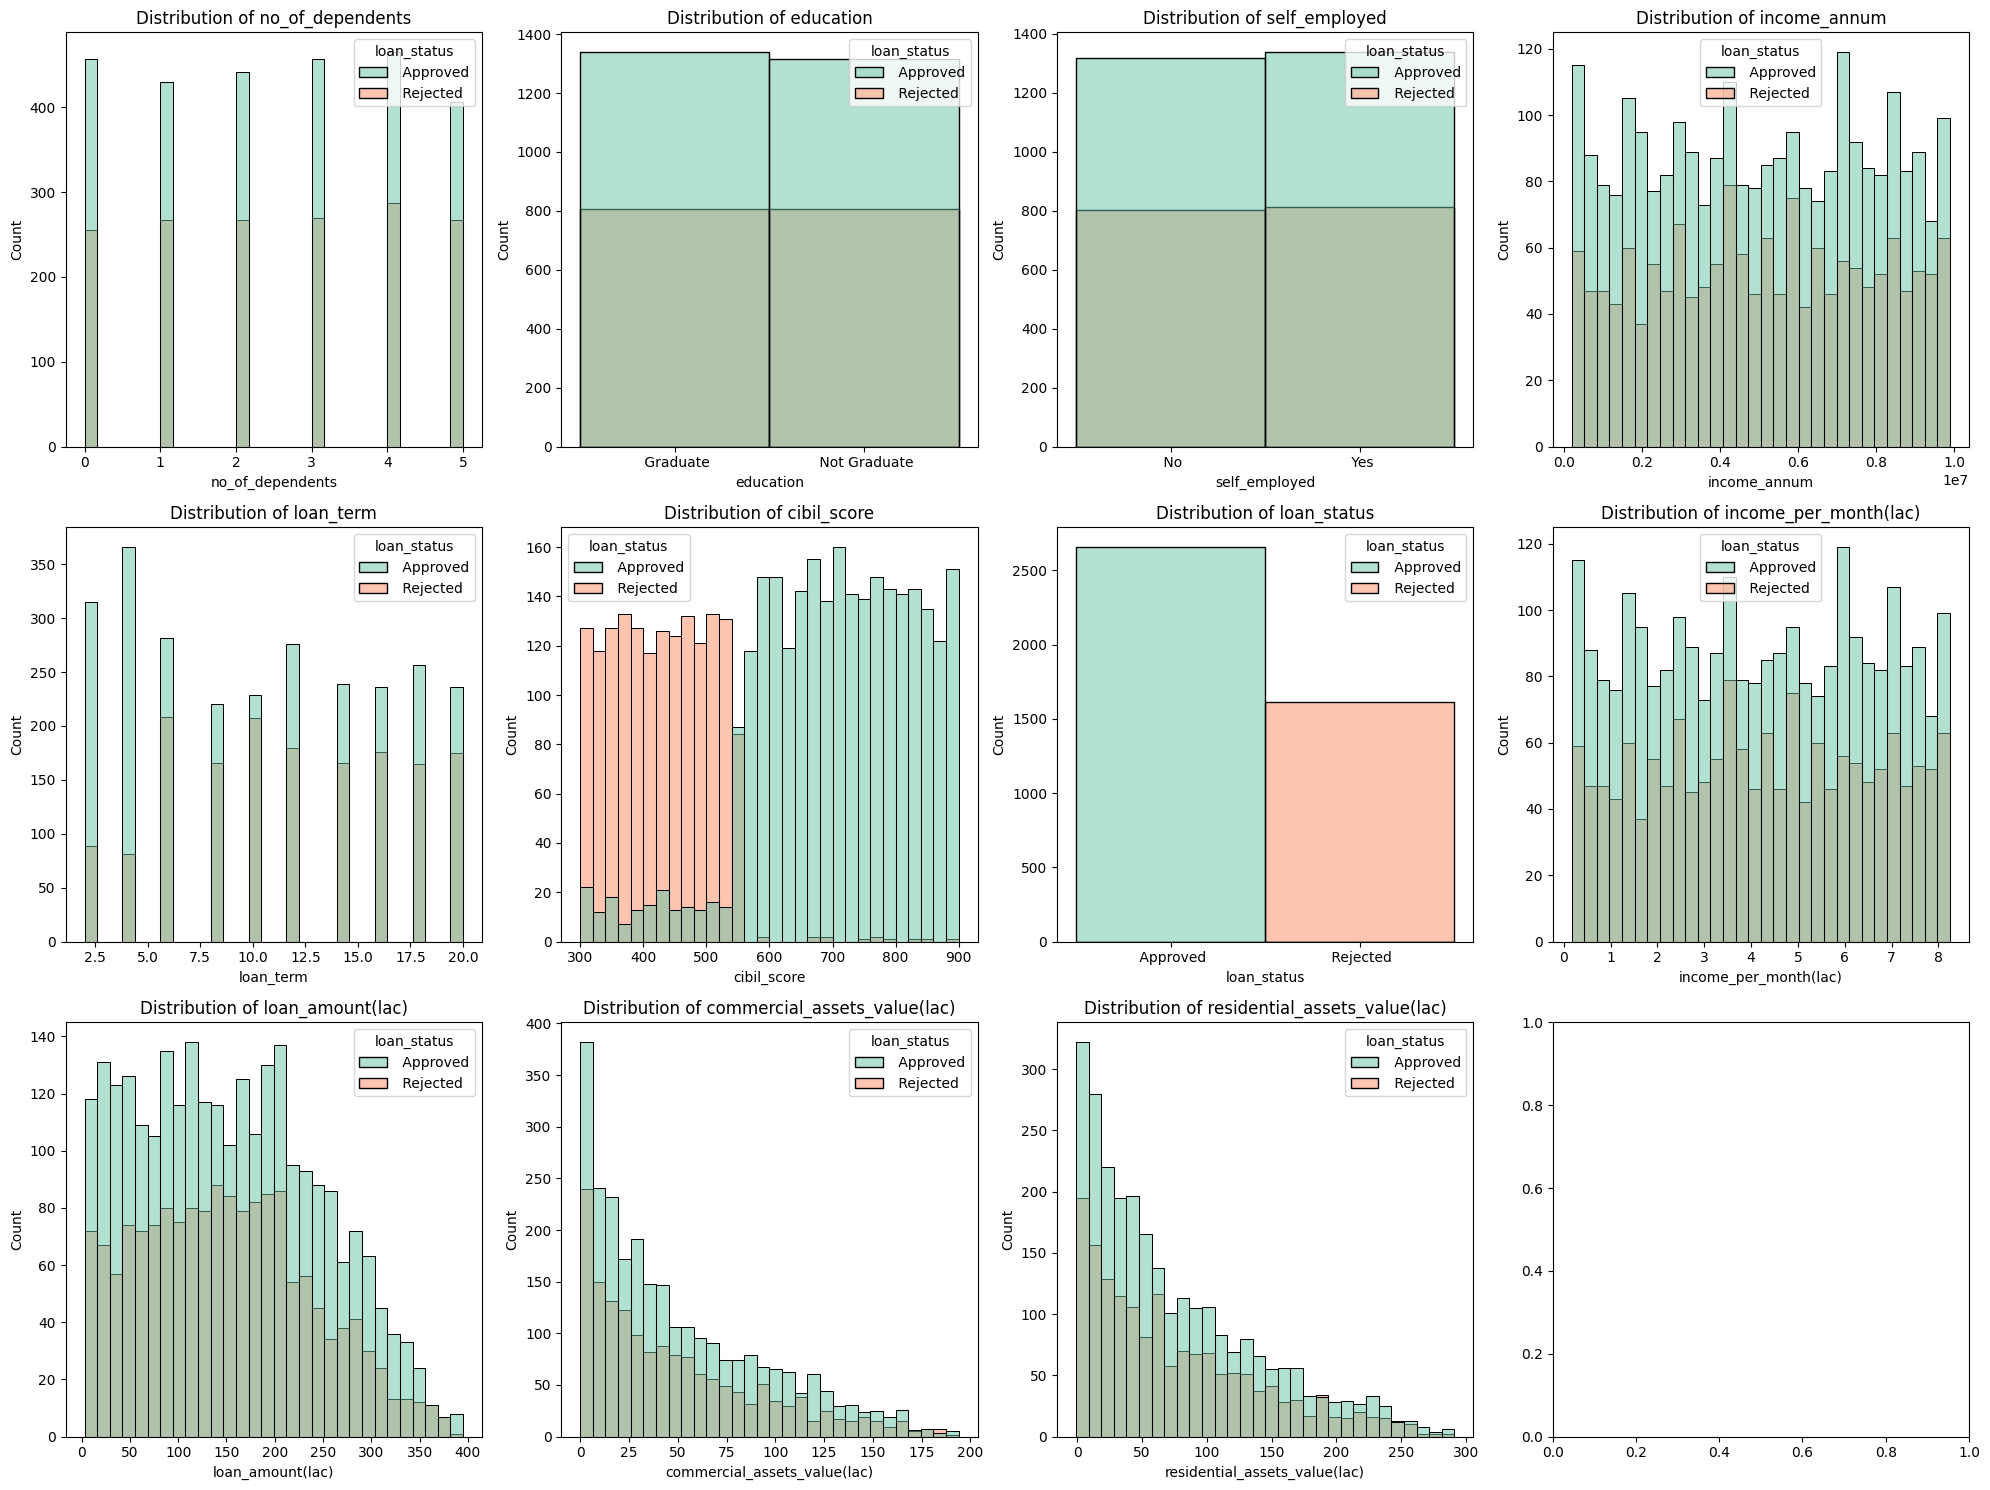

In [10]:
df1=df.drop(['loan_status'],axis='columns')
fig,axis=plt.subplots(3,4,figsize=(20,15))
axis=axis.flatten()
for i ,col in enumerate(df):
    ax=axis[i] 
    sns.histplot(data=df,x=col,hue='loan_status',palette='Set2',ax=ax,bins=30)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

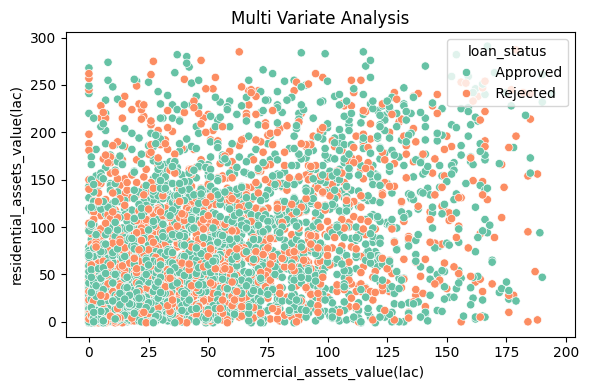

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='commercial_assets_value(lac)',y='residential_assets_value(lac)',hue='loan_status',palette='Set2')
plt.title('Multi Variate Analysis')
plt.tight_layout()

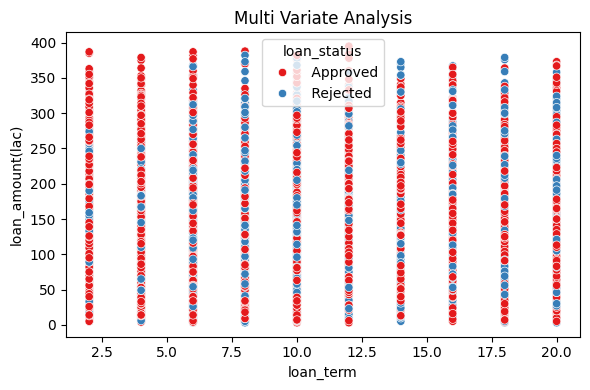

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='loan_term',y='loan_amount(lac)',hue='loan_status',palette='Set1')
plt.title('Multi Variate Analysis')
plt.tight_layout()

# Data Preprocess

In [13]:
le_edu=LabelEncoder()
le_emp=LabelEncoder()
le_st=LabelEncoder()
df['education']=le_edu.fit_transform(df['education'])
df['self_employed']=le_emp.fit_transform(df['self_employed'])
df['loan_status']=le_st.fit_transform(df['loan_status'])

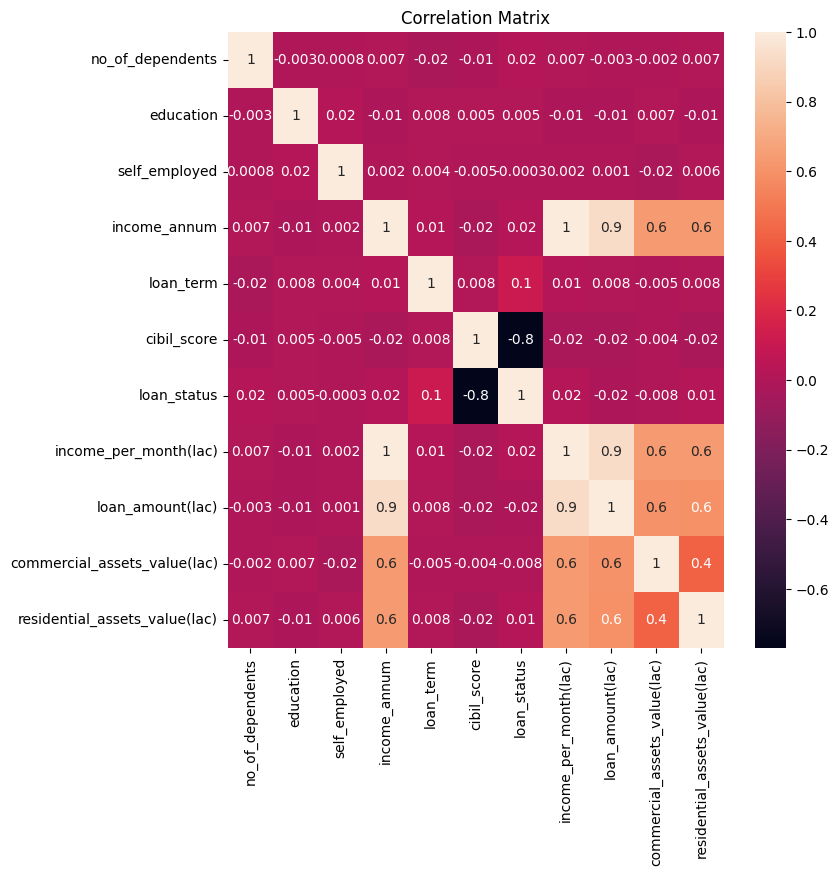

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.title('Correlation Matrix')

# Train Test Split

In [15]:
x=df.drop(['loan_status','income_annum','no_of_dependents','education','self_employed','commercial_assets_value(lac)'],axis=True)
y=df.loan_status

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=0,test_size=0.2)

# Model Training and Evaluation

In [17]:
Rf=RandomForestClassifier()
Rf.fit(x_train,y_train)
print(f"Model Accuracy:Rf.score(x_test,y_test)")

Model Accuracy:Rf.score(x_test,y_test)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.97      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



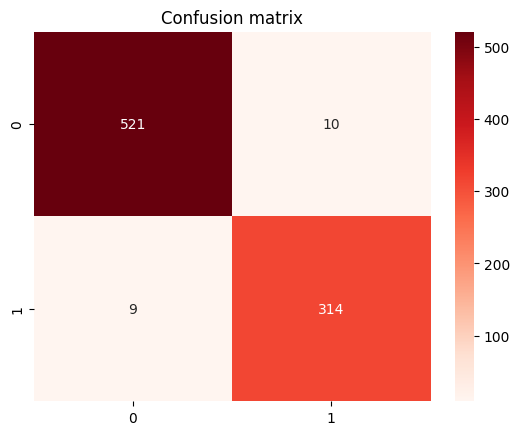

In [18]:
y_pred=Rf.predict(x_test)
print(classification_report(y_test,y_pred))
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True,cmap='Reds',fmt='d')
plt.title('Confusion matrix')

In [19]:
feature=Rf.feature_names_in_
important=Rf.feature_importances_
feature_importance=pd.DataFrame({
    'Feature_name':feature,
    'importance score':important
})
feature_importance=feature_importance.sort_values(by='importance score',ascending=False)
feature_importance

,Feature_name,importance score
1,cibil_score,0.846528
0,loan_term,0.066022
3,loan_amount(lac),0.036968
2,income_per_month(lac),0.028128
4,residential_assets_value(lac),0.022354


# Conclusion
#After testing different approaches, the Random Forest model proved to be incredibly accurate at predicting loan approvals, achieving 98% accuracy. This means it correctly identified whether someone would get approved or rejected 98 times out of 100! The model showed that credit score (CIBIL) is the most important factor, followed by income and the value of assets someone owns.

#What's really valuable is that this model can help banks process applications faster while maintaining high accuracy. For applicants, it provides clarity on what matters most when seeking loan approval. The results clearly show that maintaining a good credit score and having stable income are the keys to successful loan applications. This project demonstrates how data science can create win-win solutions for both financial institutions and their customers!